<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/15_1_%EB%A7%88%EC%8A%A4%ED%81%AC_%EC%B0%A9%EC%9A%A9%ED%8C%90%EB%8B%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

마스크 착용여부를 확인하는 모델을 만들어봅시다

https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_dir = './New Masks Dataset'
img_height = 150
img_width = 150

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Train',    
  image_size=(img_height, img_width))

Found 600 files belonging to 2 classes.


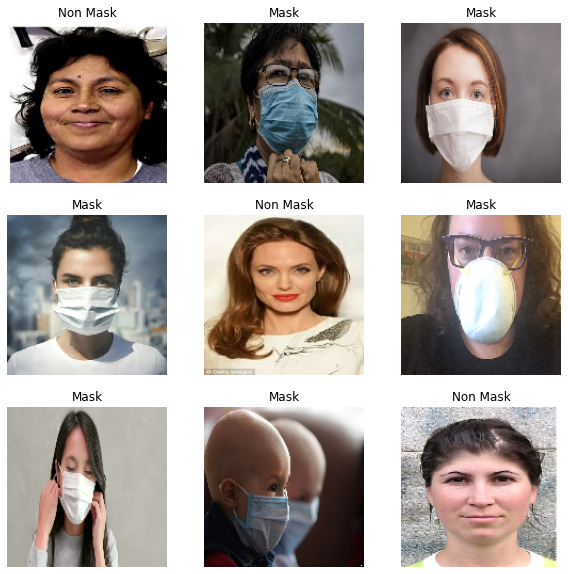

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('int'))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [5]:
imgs = []
for i, l in train_ds.take(1):
    imgs.append(i.numpy())

In [6]:
imgs

[array([[[[116.2      , 134.2      , 144.2      ],
          [116.4      , 134.4      , 144.4      ],
          [115.85     , 133.85     , 143.85     ],
          ...,
          [126.95     , 139.15     , 151.05     ],
          [124.37004  , 136.57004  , 148.47005  ],
          [125.1      , 139.1      , 150.1      ]],
 
         [[122.100006 , 140.1      , 150.1      ],
          [122.700005 , 140.70001  , 150.70001  ],
          [125.3      , 143.3      , 153.3      ],
          ...,
          [126.3      , 143.3      , 153.3      ],
          [126.999954 , 143.99995  , 153.99995  ],
          [130.93002  , 144.93002  , 155.93002  ]],
 
         [[106.05     , 124.05     , 134.05     ],
          [105.       , 123.       , 133.       ],
          [102.25     , 120.25     , 130.25     ],
          ...,
          [132.       , 146.       , 159.       ],
          [133.5      , 147.5      , 160.5      ],
          [134.5      , 148.5      , 157.5      ]],
 
         ...,
 
         [[1

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Validation',    
  image_size=(img_height, img_width))

Found 306 files belonging to 2 classes.


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir+'/Test',    
  image_size=(img_height, img_width))

Found 100 files belonging to 2 classes.


In [9]:
num_classes = 2
epochs = 10

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32,(3,3),padding='SAME',activation='relu'))  # kernel size가 같은 경우는 한개로 써도 됨 (3,3) --> 3
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0

In [10]:
num_classes = 2
epochs = 10

from tensorflow.keras import layers, models

model2 = models.Sequential()
model2.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model2.add(layers.Conv2D(32,(3,3),padding='SAME',activation='relu'))  # kernel size가 같은 경우는 한개로 써도 됨 (3,3) --> 3
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Conv2D(64,(3,3),padding='SAME',activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(256,activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model2.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [11]:
test_loss , test_acc = model.evaluate(test_ds)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 0s 14ms/step - loss: 0.2453 - acc: 0.9400
test acc :0.9399999976158142 test loss:0.2452833354473114


In [12]:
test_loss , test_acc = model2.evaluate(test_ds)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 0s 6ms/step - loss: 0.2084 - acc: 0.9200
test acc :0.9200000166893005 test loss:0.2083868831396103
